In [1]:
# Gym Stuff
import gym
import gym_anytrading
#from gym_anytrading.envs import ForexEnv, StocksEnv

from ENVS.golem_env import *
from ENVS.golem_forex_env import * 

# Stable Baselines : RL Stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

# Proceesing librairies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Side Stuff
import time
import joblib

# Technical analysis
from finta import TA

In [2]:
%%time
df = joblib.load('BASES/test_EURUSD_m5')
df.sort_index(ascending=False,inplace=True)
df.head()

CPU times: user 67.8 ms, sys: 34.8 ms, total: 103 ms
Wall time: 101 ms


,Open,High,Low,Close,Signal
2021-04-29 07:40:00,-0.000125,-0.000005,0.000160,0.000150,0
2021-04-29 07:35:00,-0.000035,0.000015,-0.000210,-0.000125,0
2021-04-29 07:30:00,-0.000165,-0.000135,-0.000135,-0.000035,0
2021-04-29 07:25:00,0.000380,-0.000010,0.000160,-0.000165,0
2021-04-29 07:20:00,-0.000295,0.000055,0.000090,0.000380,0


In [3]:
%%time
# Passing our data in the env
#_env = gym.make('forex-v0',df=df,frame_bound=(40,int(df.shape[0]/150)),window_size=40) 
_env = ForexEnv(df,frame_bound=(40,int(df.shape[0]/150)),window_size=40)

CPU times: user 5.29 ms, sys: 359 µs, total: 5.64 ms
Wall time: 5.42 ms



New reward_max : 10 


New reward_min : -10 


New reward_min : -100 


New reward_max : 100 

Info : {'total_reward': -22510.0, 'total_profit': -22509.0, 'position': 1}


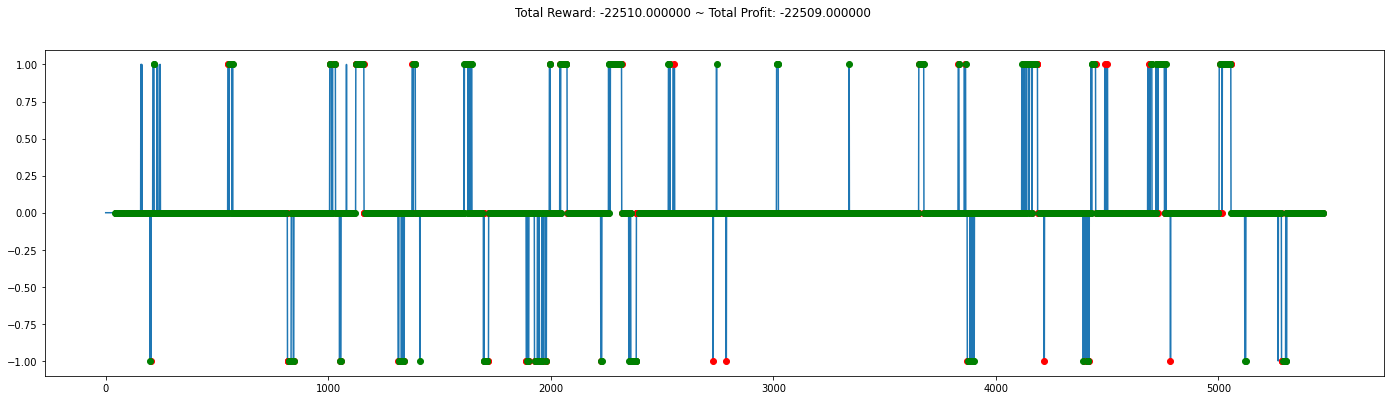

CPU times: user 706 ms, sys: 29 ms, total: 735 ms
Wall time: 728 ms


In [4]:
%%time
# Build The Environnemet
_state = _env.reset()
_reward_max = 0
_reward_min = 0
while True:
    _action = _env.action_space.sample()
    _n_state, _reward, _done, _info = _env.step(_action)
    if _reward > _reward_max:
        _reward_max = _reward
        print('\nNew reward_max :',_reward,'\n')
    if _reward < _reward_min:
        _reward_min = _reward
        print('\nNew reward_min :',_reward,'\n')
    if _done :
        print('Info :',_info)
        break
plt.figure(figsize=(24,6))
plt.cla()
_env.render_all()
plt.show()


In [5]:
%%time
_model = A2C('MlpPolicy',_env,verbose=1)
_model.learn(total_timesteps=100000)


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| time/                 |          |
|    fps                | 1040     |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.138   |
|    explained_variance | 1.09e-05 |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 0.78     |
|    value_loss         | 1.06e+03 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1084     |
|    iterations         | 200      |
|    time_elapsed       | 0        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.0778  |
|    explained_variance | 2.38e-05 |
|    learning_rate      | 0.0007   |
|    n_updates    

In [6]:
_reward

-10

Info : {'total_reward': -75840.0, 'total_profit': -75839.0, 'position': 0}


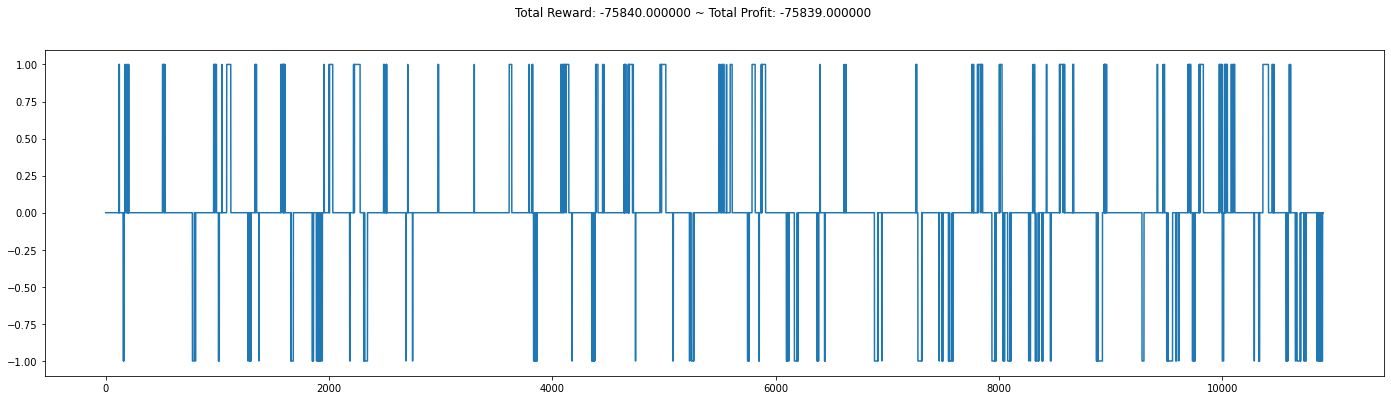

In [10]:
# Evaluation
# Passing our data in the env
#_env = ForexEnv(df,frame_bound=(40*2,int(df.shape[0]/150)*2),window_size=40) # gym.make('stocks-v0',df=df,frame_bound=(int(df.shape[0]/150),int(df.shape[0]/150)*2),window_size=40) 
_obs = _env.reset()
while True:
     #_obs = _obs[np.newaxis,...]
     _action, _states = _model.predict(_obs)
     _obs, _reward, _done, _info = _env.step(_action)
     if _done :
        print('Info :',_info)
        break
plt.figure(figsize=(24,6))
plt.cla()
_env.render_all()
plt.show()


In [3]:
from gym import envs
list(envs.registry.all())

[EnvSpec(Copy-v0),
 EnvSpec(RepeatCopy-v0),
 EnvSpec(ReversedAddition-v0),
 EnvSpec(ReversedAddition3-v0),
 EnvSpec(DuplicatedInput-v0),
 EnvSpec(Reverse-v0),
 EnvSpec(CartPole-v0),
 EnvSpec(CartPole-v1),
 EnvSpec(MountainCar-v0),
 EnvSpec(MountainCarContinuous-v0),
 EnvSpec(Pendulum-v0),
 EnvSpec(Acrobot-v1),
 EnvSpec(LunarLander-v2),
 EnvSpec(LunarLanderContinuous-v2),
 EnvSpec(BipedalWalker-v3),
 EnvSpec(BipedalWalkerHardcore-v3),
 EnvSpec(CarRacing-v0),
 EnvSpec(Blackjack-v0),
 EnvSpec(KellyCoinflip-v0),
 EnvSpec(KellyCoinflipGeneralized-v0),
 EnvSpec(FrozenLake-v0),
 EnvSpec(FrozenLake8x8-v0),
 EnvSpec(CliffWalking-v0),
 EnvSpec(NChain-v0),
 EnvSpec(Roulette-v0),
 EnvSpec(Taxi-v3),
 EnvSpec(GuessingGame-v0),
 EnvSpec(HotterColder-v0),
 EnvSpec(Reacher-v2),
 EnvSpec(Pusher-v2),
 EnvSpec(Thrower-v2),
 EnvSpec(Striker-v2),
 EnvSpec(InvertedPendulum-v2),
 EnvSpec(InvertedDoublePendulum-v2),
 EnvSpec(HalfCheetah-v2),
 EnvSpec(HalfCheetah-v3),
 EnvSpec(Hopper-v2),
 EnvSpec(Hopper-v3),
 